In [1]:
# importing libraries 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# hand written digits datasets 
mnist = keras.datasets.mnist 

In [3]:
(x_train,y_train), (x_test,y_test)  = mnist.load_data()
print(x_train.shape,y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0 

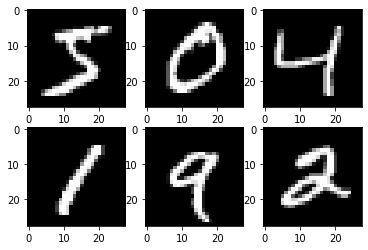

In [5]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap = 'gray')
plt.show()

In [8]:
# building the model 
# we use sequential api 

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), 
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10),
])

print(model.summary())  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# model = keras.Sequential() 
# model.add(keras.layers.Flatten(input_shape = (28,28)))
# model.add(keras.layers.Dense(128, activation = 'relu'))
# model.add(keras.layers.Dense(10))

In [10]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr = 0.001) # important hyperparameter
metrics = ["accuracy"]

model.compile(loss = loss, optimizer = optim, metrics = metrics)

In [11]:
batch_size = 64 
epochs = 5 
# fitting the model 
model.fit(x_train,y_train, batch_size = batch_size, epochs  = epochs , shuffle = True, verbose = 2)


Epoch 1/5
938/938 - 2s - loss: 0.2926 - accuracy: 0.9171
Epoch 2/5
938/938 - 2s - loss: 0.1311 - accuracy: 0.9620
Epoch 3/5
938/938 - 2s - loss: 0.0912 - accuracy: 0.9729
Epoch 4/5
938/938 - 2s - loss: 0.0711 - accuracy: 0.9783
Epoch 5/5
938/938 - 2s - loss: 0.0557 - accuracy: 0.9834


In [12]:
# model evaluation 
model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)


157/157 - 0s - loss: 0.0769 - accuracy: 0.9762


[0.07685482501983643, 0.9761999845504761]

In [15]:
# predictions 
probability_model  = keras.models.Sequential([
  model,
  keras.layers.Softmax()  
])

predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
labels0 = np.argmax(pred0)
print(labels0)

tf.Tensor(
[4.5450787e-07 1.5022188e-08 6.1643118e-04 4.4459428e-04 1.3246916e-09
 3.4266807e-06 6.1764566e-11 9.9888200e-01 7.1640402e-06 4.5878965e-05], shape=(10,), dtype=float32)
7


In [16]:
# using original model with the softmax 
predictions  = model(x_test)
predictions = tf.nn.softmax(predictions)
print(pred0)
labels0 = np.argmax(pred0)
print(labels0)

tf.Tensor(
[4.5450787e-07 1.5022188e-08 6.1643118e-04 4.4459428e-04 1.3246916e-09
 3.4266807e-06 6.1764566e-11 9.9888200e-01 7.1640402e-06 4.5878965e-05], shape=(10,), dtype=float32)
7


In [18]:
# other way of predictions 
predictions = model.predict(x_test, batch_size = batch_size)
predictions  = tf.nn.softmax(predictions)
pred5 = predictions[0:5]
print(pred5.shape)
labels5 = np.argmax(pred5,axis = 1)
print(labels5)

(5, 10)
[7 2 1 0 4]


Credits = python_engineer 
https://youtu.be/LwM7xabuiIc